In [1]:
import os
import sys

import joblib
from tensorflow.keras import callbacks
import matplotlib.pyplot as pyplot
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy
import pandas
from sklearn.pipeline import Pipeline
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import seaborn
from keras.utils import to_categorical

WORKING_DIR_PATH = globals()['_dh'][0]
WORKING_DIR_PARENT_PATH = os.path.dirname(WORKING_DIR_PATH)
sys.path.insert(1, WORKING_DIR_PARENT_PATH)
from custom_module.utilities import (
    GENRES,
    MOUNTED_DATASET_PATH,
    normalization_pipeline,
    set_shape_create_cnn_model
)

In [2]:
# load dataset
features = pandas.read_csv(MOUNTED_DATASET_PATH + '/data/cleaned_features_1.csv', index_col=0)
features

,25th_percentile_db4_cA4,25th_percentile_db4_cD1,25th_percentile_db4_cD2,25th_percentile_db4_cD3,25th_percentile_db4_cD4,25th_percentile_db5_cA4,25th_percentile_db5_cD1,25th_percentile_db5_cD2,25th_percentile_db5_cD3,25th_percentile_db5_cD4,...,zcr_db5_cD3,zcr_db5_cD4,zcr_db8_cA7,zcr_db8_cD1,zcr_db8_cD2,zcr_db8_cD3,zcr_db8_cD4,zcr_db8_cD5,zcr_db8_cD6,zcr_db8_cD7
0,-0.236240,-0.012063,-0.027807,-0.051443,-0.082820,-0.237137,-0.011746,-0.027222,-0.051066,-0.082349,...,48729.0,24515.0,1367.0,236539.0,100477.0,48721.0,24523.0,10601.0,5868.0,2136.0
1,-0.733787,-0.017003,-0.045150,-0.053358,-0.045559,-0.728479,-0.016115,-0.044458,-0.053728,-0.045010,...,40467.0,21751.0,4280.0,232788.0,104560.0,40835.0,21922.0,11688.0,5678.0,4187.0
2,-0.206548,-0.001990,-0.004977,-0.010344,-0.032882,-0.206663,-0.001933,-0.004869,-0.009837,-0.031671,...,51110.0,28460.0,3429.0,238953.0,98627.0,50426.0,28197.0,12380.0,5750.0,2853.0
3,-0.505051,-0.017088,-0.050502,-0.085439,-0.155965,-0.503971,-0.016430,-0.050478,-0.080363,-0.153229,...,46009.0,24784.0,4084.0,239878.0,106315.0,46383.0,25001.0,10550.0,6405.0,3401.0
4,-0.265025,-0.007068,-0.017015,-0.033292,-0.048008,-0.263057,-0.006823,-0.016241,-0.032975,-0.046946,...,50126.0,21473.0,3355.0,235508.0,96446.0,50054.0,21542.0,11100.0,6028.0,3176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,-0.104572,-0.000267,-0.001287,-0.004655,-0.018606,-0.104197,-0.000241,-0.001230,-0.004309,-0.018012,...,111718.0,57071.0,5266.0,478728.0,194404.0,110085.0,56729.0,26120.0,10705.0,4714.0
3333,-0.064313,-0.000214,-0.000820,-0.004044,-0.013585,-0.064493,-0.000202,-0.000685,-0.003693,-0.013236,...,100899.0,57721.0,5961.0,378640.0,180357.0,98690.0,57296.0,25947.0,13375.0,3125.0
3334,-0.477425,-0.000967,-0.004003,-0.008481,-0.038837,-0.476932,-0.000873,-0.004009,-0.007479,-0.036333,...,95367.0,62597.0,3067.0,491052.0,210852.0,92628.0,61759.0,24119.0,12008.0,6321.0
3335,-0.328624,-0.001875,-0.008336,-0.021885,-0.049970,-0.329515,-0.001693,-0.008131,-0.021180,-0.048207,...,101933.0,50380.0,5290.0,483699.0,219884.0,100631.0,49950.0,30214.0,9810.0,5397.0


In [3]:
# shuffle dataset
features = features.reindex(numpy.random.permutation(features.index))
features

,25th_percentile_db4_cA4,25th_percentile_db4_cD1,25th_percentile_db4_cD2,25th_percentile_db4_cD3,25th_percentile_db4_cD4,25th_percentile_db5_cA4,25th_percentile_db5_cD1,25th_percentile_db5_cD2,25th_percentile_db5_cD3,25th_percentile_db5_cD4,...,zcr_db5_cD3,zcr_db5_cD4,zcr_db8_cA7,zcr_db8_cD1,zcr_db8_cD2,zcr_db8_cD3,zcr_db8_cD4,zcr_db8_cD5,zcr_db8_cD6,zcr_db8_cD7
1810,-0.458771,-0.011345,-0.040091,-0.083547,-0.169737,-0.459046,-0.010723,-0.039571,-0.081663,-0.168709,...,91014.0,52085.0,6553.0,514430.0,224480.0,91035.0,52395.0,21672.0,11281.0,6760.0
1881,-0.331145,-0.000822,-0.008179,-0.043446,-0.068350,-0.331757,-0.000596,-0.007001,-0.043348,-0.068130,...,126785.0,36192.0,6470.0,374737.0,214912.0,126898.0,36477.0,24035.0,13175.0,6777.0
2694,-0.138664,-0.001379,-0.003927,-0.010158,-0.026524,-0.137422,-0.001322,-0.003817,-0.009750,-0.025942,...,104629.0,51057.0,8128.0,486783.0,206166.0,103967.0,50431.0,25749.0,11937.0,5732.0
1304,-0.459344,-0.014304,-0.038177,-0.063067,-0.085567,-0.461462,-0.013701,-0.037880,-0.063500,-0.085462,...,94492.0,47070.0,6084.0,483397.0,191129.0,94247.0,47111.0,23785.0,12232.0,6456.0
2957,-0.871877,-0.010415,-0.035570,-0.086992,-0.230081,-0.875678,-0.009762,-0.034515,-0.083134,-0.224582,...,113379.0,48083.0,6258.0,481254.0,207868.0,113030.0,48392.0,25497.0,9858.0,6246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,-0.507808,-0.011467,-0.025933,-0.033618,-0.065211,-0.507328,-0.011109,-0.025656,-0.033134,-0.063043,...,43896.0,25719.0,3849.0,228299.0,90473.0,43625.0,25554.0,12939.0,6879.0,2764.0
1541,-0.771594,-0.021030,-0.048028,-0.079806,-0.110843,-0.770188,-0.020619,-0.047055,-0.080227,-0.109552,...,94797.0,46537.0,3437.0,519454.0,186289.0,94732.0,46582.0,28336.0,10566.0,5509.0
2581,-0.379905,-0.002791,-0.016099,-0.041235,-0.074148,-0.380161,-0.002411,-0.015578,-0.041450,-0.073217,...,90724.0,54572.0,5676.0,450466.0,244559.0,90633.0,54455.0,25111.0,10249.0,6129.0
809,-0.172565,-0.000336,-0.001042,-0.002494,-0.009889,-0.172684,-0.000319,-0.001026,-0.002385,-0.009207,...,109863.0,58467.0,7308.0,512640.0,194589.0,107884.0,56299.0,27247.0,15411.0,3589.0


In [4]:
# split dataset into target (y) and predictors (x)
y = features.loc[:,'genre_label']
X = features.loc[:, features.columns.difference(['genre_label'])]

In [5]:
# get predictor labels
predictors_all_label = X.columns.values

In [6]:
# split into sets: training 80% & testing 20% of total dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2669, 360), (668, 360), (2669,), (668,))

In [7]:
# Create normalization pipelines
norm_pipe = normalization_pipeline(
    predictors_all_label)

In [8]:
_, ncols = X_train.shape

In [9]:
# one hot encoding our labels
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)
y_train.shape, y_test.shape

((2669, 3), (668, 3))

In [10]:
# set log directory for tensorboard logs
root_logdir = os.path.join(os.curdir, "my_logs")

In [11]:
def get_run_logdir(): 
    '''
    get_run_logdir() generates subdirectory path with
    current date & time.
    '''   
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") 
    return os.path.join(root_logdir, run_id)

In [12]:
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_01_16-11_28_43'

In [13]:
# define tensorbaord & early stopping callback
tensorboard_cb = callbacks.TensorBoard(run_logdir) 

early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                        restore_best_weights=True)

In [14]:
params = {
    'clf__units': 2, 'clf__optimizer': 'adam',
    'clf__n_hidden': 2, 'clf__lr': 0.0001,
    'clf__kernel_initializer': 'glorot_uniform',
    'clf__filters': 32, 'clf__dropout': 0.15,
    'clf__activation': 'selu'
}

In [15]:
# wrap the function with keras wrapper
clf = KerasClassifier(
    build_fn=set_shape_create_cnn_model('cnn', ncols))

In [16]:
pipe = Pipeline([
    ('norm_pipe', norm_pipe),
    ('clf', clf)
])

pipe = pipe.set_params(**params)

In [17]:
# training best classifier with all training set & validate with test set
pipe = pipe.fit(X_train, y_train, clf__batch_size=15,
                clf__validation_split=0.2, clf__epochs=100,
                clf__callbacks=[tensorboard_cb, early_stopping_cb])

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 358, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 179, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 177, 64)           6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 88, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 86, 96)            18528     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 43, 96)            0         
_________________________________________________________________
flatten (Flatten)            (None, 4128)              0       

143/143 [==============================] - 2s 12ms/step - loss: 0.7056 - accuracy: 0.6464 - val_loss: 0.7065 - val_accuracy: 0.7097
Epoch 45/100
143/143 [==============================] - 2s 16ms/step - loss: 0.7231 - accuracy: 0.6454 - val_loss: 0.6957 - val_accuracy: 0.7097
Epoch 46/100
143/143 [==============================] - 2s 15ms/step - loss: 0.7108 - accuracy: 0.6496 - val_loss: 0.6932 - val_accuracy: 0.7228
Epoch 47/100
143/143 [==============================] - 2s 15ms/step - loss: 0.7034 - accuracy: 0.6515 - val_loss: 0.6937 - val_accuracy: 0.7266
Epoch 48/100
143/143 [==============================] - 2s 12ms/step - loss: 0.7039 - accuracy: 0.6440 - val_loss: 0.6877 - val_accuracy: 0.7285
Epoch 49/100
143/143 [==============================] - 2s 11ms/step - loss: 0.6834 - accuracy: 0.6703 - val_loss: 0.6858 - val_accuracy: 0.7154
Epoch 50/100
143/143 [==============================] - 2s 16ms/step - loss: 0.6744 - accuracy: 0.6806 - val_loss: 0.6932 - val_accuracy: 0.700

In [18]:
predicted_y_test = pipe.predict_proba(X_test)

Instructions for updating:
Please use `model.predict()` instead.


In [19]:
predicted_y_test

array([[0.09660336, 0.31013337, 0.5932632 ],
       [0.7999834 , 0.07174283, 0.12827373],
       [0.3129914 , 0.3231803 , 0.3638283 ],
       ...,
       [0.9604021 , 0.00411725, 0.03548069],
       [0.92532307, 0.01620113, 0.05847583],
       [0.00353163, 0.9943474 , 0.00212092]], dtype=float32)

In [20]:
# check the number of targets per class
for i in range(3):
    print(str(i) + ' - ' +  GENRES[i] + ': ' +
          str(sum([1 for target in y_test if target[i] == 1])))
#     print(f'{i}: {sum([1 for target in y_test if target[i] == 1])}')

0 - hiphop: 219
1 - rock: 232
2 - pop: 217


In [21]:
# check the number of predicted values in each class
for i in range(3): 
    print(str(i) + ' - ' +  GENRES[i] + ': ' + 
          str(sum([1 for prediction in predicted_y_test if numpy.argmax(prediction) == i])))


0 - hiphop: 234
1 - rock: 227
2 - pop: 207


In [22]:
# calculate the confusion matrix 
# row: actual
# columns: predicted
conf_matrix = confusion_matrix(numpy.argmax(y_test, 1), numpy.argmax(predicted_y_test, 1))
conf_matrix

array([[196,   9,  14],
       [ 11, 168,  53],
       [ 27,  50, 140]])

In [23]:
# create a dataframe of the confusion matrix with genre labels for readability 
confusion_df = pandas.DataFrame(conf_matrix)
confusion_df

,0,1,2
0,196,9,14
1,11,168,53
2,27,50,140


In [24]:
GENRES_MAP = {
    0: 'hiphop',
    1: 'rock',
    2: 'pop'
}

In [25]:
# rename rows and columns with genre labels
confusion_df = confusion_df.rename(columns=GENRES_MAP)
confusion_df.index = confusion_df.columns
confusion_df

,hiphop,rock,pop
hiphop,196,9,14
rock,11,168,53
pop,27,50,140


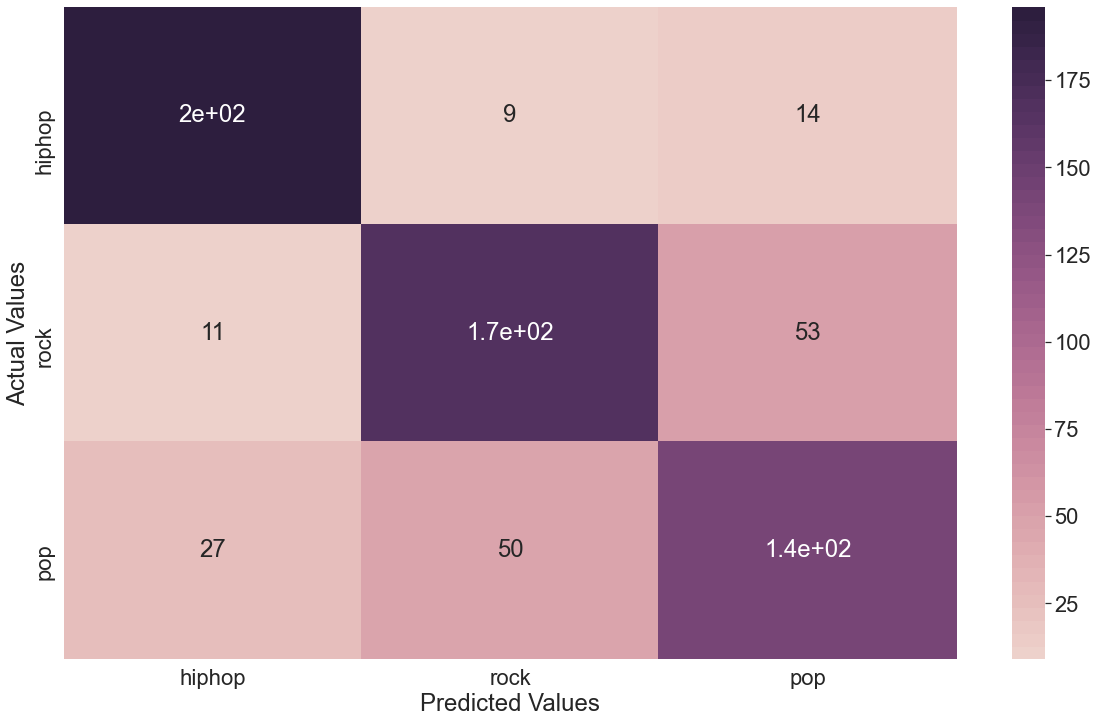

In [26]:
# create a heatmap for the confusion matrix for display
pyplot.figure(figsize= (20,12))
seaborn.set(font_scale = 2);
ax = seaborn.heatmap(confusion_df, annot=True, cmap=seaborn.cubehelix_palette(50));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');

In [30]:
def train_final_model(X, y):
    clf = KerasClassifier(
        build_fn=set_shape_create_cnn_model('cnn', ncols)
    )
    
    pipe = Pipeline([
        ('norm_pipe', norm_pipe),
        ('clf', clf)
    ])

    pipe = pipe.set_params(**params)
    
    y = to_categorical(y, 3)
    
    return pipe.fit(X, y, clf__batch_size=15,
                    clf__epochs=100, 
                    clf__validation_split=.2,
                    clf__callbacks=[
                        tensorboard_cb, 
                        early_stopping_cb
                    ])

In [31]:
final_model = train_final_model(X, y)

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 358, 32)           128       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 179, 32)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 177, 64)           6208      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 88, 64)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 86, 96)            18528     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 43, 96)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4128)              0       

178/178 [==============================] - 3s 16ms/step - loss: 0.6963 - accuracy: 0.6553 - val_loss: 0.6349 - val_accuracy: 0.7665
Epoch 45/100
178/178 [==============================] - 2s 14ms/step - loss: 0.6921 - accuracy: 0.6628 - val_loss: 0.6272 - val_accuracy: 0.7545
Epoch 46/100
178/178 [==============================] - 2s 12ms/step - loss: 0.7021 - accuracy: 0.6579 - val_loss: 0.6292 - val_accuracy: 0.7605
Epoch 47/100
178/178 [==============================] - 3s 15ms/step - loss: 0.6911 - accuracy: 0.6594 - val_loss: 0.6326 - val_accuracy: 0.7485
Epoch 48/100
178/178 [==============================] - 3s 16ms/step - loss: 0.6898 - accuracy: 0.6695 - val_loss: 0.6355 - val_accuracy: 0.7440
Epoch 49/100
178/178 [==============================] - 2s 14ms/step - loss: 0.6792 - accuracy: 0.6647 - val_loss: 0.6385 - val_accuracy: 0.7545
Epoch 50/100
178/178 [==============================] - 2s 12ms/step - loss: 0.6680 - accuracy: 0.6767 - val_loss: 0.6330 - val_accuracy: 0.733

In [32]:
norm_pipe = final_model.named_steps['norm_pipe']
clf = final_model.named_steps['clf']

In [33]:
# save pipeline estimator to disk
norm_pipe_path = MOUNTED_DATASET_PATH + '/model/pipeline_estimator_1.pkl'
joblib.dump(norm_pipe, open(norm_pipe_path, 'wb'))

In [34]:
#  save keras model to disk
model_path = MOUNTED_DATASET_PATH + '/model/cnn_model_1.h5'
clf.model.save(model_path)